In [1]:
import torch
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

In [2]:
train_data = datasets.FashionMNIST('data', train=True, download=True)
train_data = list(train_data)[:4000]

In [3]:
print(type(train_data))
print(type(train_data[0]))
train_data[:10]

<class 'list'>
<class 'tuple'>


[(<PIL.Image.Image image mode=L size=28x28>, 9),
 (<PIL.Image.Image image mode=L size=28x28>, 0),
 (<PIL.Image.Image image mode=L size=28x28>, 0),
 (<PIL.Image.Image image mode=L size=28x28>, 3),
 (<PIL.Image.Image image mode=L size=28x28>, 0),
 (<PIL.Image.Image image mode=L size=28x28>, 2),
 (<PIL.Image.Image image mode=L size=28x28>, 7),
 (<PIL.Image.Image image mode=L size=28x28>, 2),
 (<PIL.Image.Image image mode=L size=28x28>, 5),
 (<PIL.Image.Image image mode=L size=28x28>, 5)]

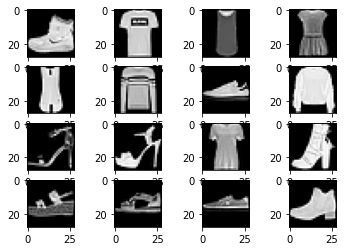

In [4]:
# plot the first 16 images in the training data
# enumerate作用？
for i, (img, label) in enumerate(train_data[:16]):
    plt.subplot(4, 4, i+1)
    plt.imshow(img, cmap="gray")
plt.show()

In [5]:
train_data = datasets.FashionMNIST('data', train=True, download=True, transform=transforms.ToTensor())
train_data = list(train_data)[:4000]

In [6]:
# 划分训练集和验证集
train_data, val_data = train_data[:3500], train_data[3500:]

In [7]:
class Softmax(torch.nn.Module):
    def __init__(self, n_inputs, n_outputs):
        super().__init__()
        self.linear = torch.nn.Linear(n_inputs, n_outputs)

    def forward(self, x):
        pred = self.linear(x)
        return pred

In [8]:
# 使用Softmax执行分类
model_softmax = Softmax(784, 10)
print(model_softmax)

Softmax(
  (linear): Linear(in_features=784, out_features=10, bias=True)
)


In [9]:
for name, parameter in model_softmax.named_parameters():
    print(name, parameter) # w and b 

linear.weight Parameter containing:
tensor([[-0.0035, -0.0031,  0.0099,  ...,  0.0349,  0.0228,  0.0234],
        [ 0.0292,  0.0266,  0.0243,  ...,  0.0355, -0.0188,  0.0068],
        [-0.0251, -0.0084,  0.0094,  ..., -0.0106,  0.0296, -0.0058],
        ...,
        [-0.0055, -0.0266, -0.0054,  ...,  0.0339,  0.0147,  0.0058],
        [ 0.0110, -0.0125, -0.0239,  ...,  0.0288,  0.0141,  0.0287],
        [ 0.0205,  0.0046,  0.0165,  ..., -0.0310,  0.0005,  0.0044]],
       requires_grad=True)
linear.bias Parameter containing:
tensor([ 0.0328,  0.0058, -0.0292, -0.0276,  0.0265, -0.0057, -0.0028, -0.0168,
         0.0310,  0.0340], requires_grad=True)


In [10]:
# define loss, optimizier, and dataloader for train and validation sets
optimizer = torch.optim.SGD(model_softmax.parameters(), lr = 0.01)
criterion = torch.nn.CrossEntropyLoss()
batch_size = 16
train_loader = DataLoader(dataset = train_data, batch_size = batch_size)
val_loader = DataLoader(dataset = val_data, batch_size = batch_size)

In [11]:
epochs = 200
Loss = []
acc = []
for epoch in range(epochs):
    for i, (images, labels) in enumerate(train_loader):
        optimizer.zero_grad()
        outputs = model_softmax(images.view(-1, 28*28))
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
    # 每次epoach训练结束后的loss
    Loss.append(loss.item())
    # 正确分类的样本数
    correct = 0
    for images, labels in val_loader:
        # view(-1,28*28)是什么意思?
        outputs = model_softmax(images.view(-1, 28*28))
        # 为什么通过torch.max就能知道预测样本标签？
        _, predicted = torch.max(outputs.data, 1)
        correct += (predicted == labels).sum()
    accuracy = 100 * (correct.item()) / len(val_data)
    acc.append(accuracy)
    if epoch % 10 == 0:
        print('Epoch: {}. Loss: {}. Accuracy: {}'.format(epoch, loss.item(), accuracy))

Epoch: 0. Loss: 1.0298194885253906. Accuracy: 66.6
Epoch: 10. Loss: 0.5907781720161438. Accuracy: 77.8
Epoch: 20. Loss: 0.5159797072410583. Accuracy: 80.6
Epoch: 30. Loss: 0.4717177152633667. Accuracy: 82.6
Epoch: 40. Loss: 0.4394112825393677. Accuracy: 82.4
Epoch: 50. Loss: 0.4138254225254059. Accuracy: 83.0
Epoch: 60. Loss: 0.39265188574790955. Accuracy: 83.4
Epoch: 70. Loss: 0.3745977580547333. Accuracy: 83.2
Epoch: 80. Loss: 0.35884201526641846. Accuracy: 83.4
Epoch: 90. Loss: 0.3448304235935211. Accuracy: 83.4
Epoch: 100. Loss: 0.3321754038333893. Accuracy: 83.8
Epoch: 110. Loss: 0.32060107588768005. Accuracy: 83.8
Epoch: 120. Loss: 0.30990663170814514. Accuracy: 83.8
Epoch: 130. Loss: 0.29994356632232666. Accuracy: 83.4
Epoch: 140. Loss: 0.29060110449790955. Accuracy: 83.8
Epoch: 150. Loss: 0.28179511427879333. Accuracy: 83.8
Epoch: 160. Loss: 0.2734602391719818. Accuracy: 84.0
Epoch: 170. Loss: 0.26554542779922485. Accuracy: 83.6
Epoch: 180. Loss: 0.2580104172229767. Accuracy: 8

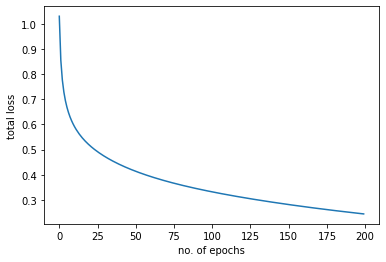

In [12]:
plt.plot(Loss)
plt.xlabel("no. of epochs")
plt.ylabel("total loss")
plt.show()

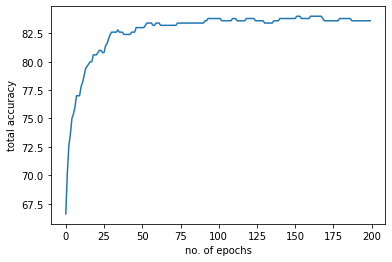

In [13]:
plt.plot(acc)
plt.xlabel("no. of epochs")
plt.ylabel("total accuracy")
plt.show()